In [2]:
# Importing necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
# import zipfile
import pandas as pd
import numpy as np
import os

## Phase 1: Data Collection and Preparation

In [9]:
hl = pd.read_csv(r"https://raw.githubusercontent.com/ek-chris/Practice_datasets/refs/heads/main/home_loan_test.csv")

In [10]:
hd = pd.read_csv(r"https://raw.githubusercontent.com/ek-chris/Practice_datasets/refs/heads/main/home_loan_train.csv")

hd.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [11]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [12]:
hl.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [16]:

comb_data = pd.concat([hl,hd], ignore_index=True)

In [66]:
comb_data.shape

(981, 13)

In [17]:
comb_data.to_csv(r"Home_loan")

In [13]:
# To handle the issue of loading data due to network, I will be using the saved dataset instead

df = pd.read_csv(r"Home_loan")

df.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP001015,Male,Yes,0,Graduate,No,5720,0.0,110.0,360.0,1.0,Urban,NaN
1,1,LP001022,Male,Yes,1,Graduate,No,3076,1500.0,126.0,360.0,1.0,Urban,NaN
2,2,LP001031,Male,Yes,2,Graduate,No,5000,1800.0,208.0,360.0,1.0,Urban,NaN
3,3,LP001035,Male,Yes,2,Graduate,No,2340,2546.0,100.0,360.0,NaN,Urban,NaN
4,4,LP001051,Male,No,0,Not Graduate,No,3276,0.0,78.0,360.0,1.0,Urban,NaN


In [18]:
# Fill missing values in all non-numerical columns with their respective modes.
mode_gender = df["Gender"].mode()[0]        # This will return the highest occurrences values therein.
df["Gender"].fillna(mode_gender, inplace=True)

mode_married = df["Married"].mode()[0]
df["Married"].fillna(mode_married, inplace=True)

mode_dependents = df["Dependents"].mode()[0]
df["Dependents"].fillna(mode_dependents, inplace=True)

mode_employed = df["Self_Employed"].mode()[0]
df["Self_Employed"].fillna(mode_employed, inplace=True)

mode_loan = df["Loan_Status"].mode()[0]
df["Loan_Status"].fillna(mode_loan, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_11748\1481416927.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Gender"].fillna(mode_gender, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_11748\1481416927.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [19]:
# Fill missing values in all numerical columns with their respective medians
df_filled_median = df.fillna(df.median(numeric_only=True))

In [20]:
df.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP001015,Male,Yes,0,Graduate,No,5720,0.0,110.0,360.0,1.0,Urban,Y
1,1,LP001022,Male,Yes,1,Graduate,No,3076,1500.0,126.0,360.0,1.0,Urban,Y
2,2,LP001031,Male,Yes,2,Graduate,No,5000,1800.0,208.0,360.0,1.0,Urban,Y
3,3,LP001035,Male,Yes,2,Graduate,No,2340,2546.0,100.0,360.0,NaN,Urban,Y
4,4,LP001051,Male,No,0,Not Graduate,No,3276,0.0,78.0,360.0,1.0,Urban,Y


In [21]:
df_filled_median.isna().sum()

Unnamed: 0           0
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [81]:
df.head(10)

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP001015,Male,Yes,0,Graduate,No,5720,0.0,110.0,360.0,1.0,Urban,Y
1,1,LP001022,Male,Yes,1,Graduate,No,3076,1500.0,126.0,360.0,1.0,Urban,Y
2,2,LP001031,Male,Yes,2,Graduate,No,5000,1800.0,208.0,360.0,1.0,Urban,Y
3,3,LP001035,Male,Yes,2,Graduate,No,2340,2546.0,100.0,360.0,NaN,Urban,Y
4,4,LP001051,Male,No,0,Not Graduate,No,3276,0.0,78.0,360.0,1.0,Urban,Y
5,5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422.0,152.0,360.0,1.0,Urban,Y
6,6,LP001055,Female,No,1,Not Graduate,No,2226,0.0,59.0,360.0,1.0,Semiurban,Y
7,7,LP001056,Male,Yes,2,Not Graduate,No,3881,0.0,147.0,360.0,0.0,Rural,Y
8,8,LP001059,Male,Yes,2,Graduate,No,13633,0.0,280.0,240.0,1.0,Urban,Y
9,9,LP001067,Male,No,0,Not Graduate,No,2400,2400.0,123.0,360.0,1.0,Semiurban,Y


## Phase 2: Exploratory Data Analysis (EDA)

`Task 2.1: Conduct descriptive statistics to summarize the key characteristics of the data.`

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         981 non-null    int64  
 1   Loan_ID            981 non-null    object 
 2   Gender             981 non-null    object 
 3   Married            981 non-null    object 
 4   Dependents         981 non-null    object 
 5   Education          981 non-null    object 
 6   Self_Employed      981 non-null    object 
 7   ApplicantIncome    981 non-null    int64  
 8   CoapplicantIncome  981 non-null    float64
 9   LoanAmount         954 non-null    float64
 10  Loan_Amount_Term   961 non-null    float64
 11  Credit_History     902 non-null    float64
 12  Property_Area      981 non-null    object 
 13  Loan_Status        981 non-null    object 
dtypes: float64(4), int64(2), object(8)
memory usage: 107.4+ KB


In [24]:
df.describe()

,Unnamed: 0,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,981.000000,954.000000,961.000000,902.000000
mean,490.000000,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,283.334608,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,0.000000,9.000000,6.000000,0.000000
25%,245.000000,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,490.000000,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,735.000000,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,980.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [25]:
df.columns

Index(['Unnamed: 0', 'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [26]:
alpha_features = df.select_dtypes(include=['object'])
alpha_features

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,Urban,Y
4,LP001051,Male,No,0,Not Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
976,LP002978,Female,No,0,Graduate,No,Rural,Y
977,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
978,LP002983,Male,Yes,1,Graduate,No,Urban,Y
979,LP002984,Male,Yes,2,Graduate,No,Urban,Y


In [27]:
num_features = df.select_dtypes(include=['float64','int64']).columns

num_features

Index(['Unnamed: 0', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [28]:
df[num_features].describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,981.0,490.000000,283.334608,0.0,245.0,490.0,735.0,980.0
ApplicantIncome,981.0,5179.795107,5695.104533,0.0,2875.0,3800.0,5516.0,81000.0
CoapplicantIncome,981.0,1601.916330,2718.772806,0.0,0.0,1110.0,2365.0,41667.0
LoanAmount,954.0,142.511530,77.421743,9.0,100.0,126.0,162.0,700.0
Loan_Amount_Term,961.0,342.201873,65.100602,6.0,360.0,360.0,360.0,480.0
Credit_History,902.0,0.835920,0.370553,0.0,1.0,1.0,1.0,1.0


In [29]:
#Checking the no of unique loan applicants
df['Loan_ID'].nunique()

981

In [ ]:
married_count = df['Gender'].astype(str).value_counts()
married_count

Gender
Male      799
Female    182
Name: count, dtype: int64

In [55]:
#Checking for number of loan applicants by gender
Gender_count = df['Gender'].astype(str).value_counts()
Gender_count

Gender
Male      799
Female    182
Name: count, dtype: int64

In [53]:
#Checking for number of loan applicants by their education
Edu_counts = df['Education'].astype(str).value_counts()
Edu_counts

Education
Graduate        763
Not Graduate    218
Name: count, dtype: int64

In [45]:
property_counts = df['Property_Area'].astype(str).value_counts()


property_counts

Property_Area
Semiurban    349
Urban        342
Rural        290
Name: count, dtype: int64

In [65]:
loan_status_counts = df['Loan_Status'].astype(str).value_counts()
loan_status_counts

Loan_Status
Y    789
N    192
Name: count, dtype: int64

`Task 2.2: Visualize distributions of numerical features (e.g., applicant income, loan amount) using histograms and box plots.`

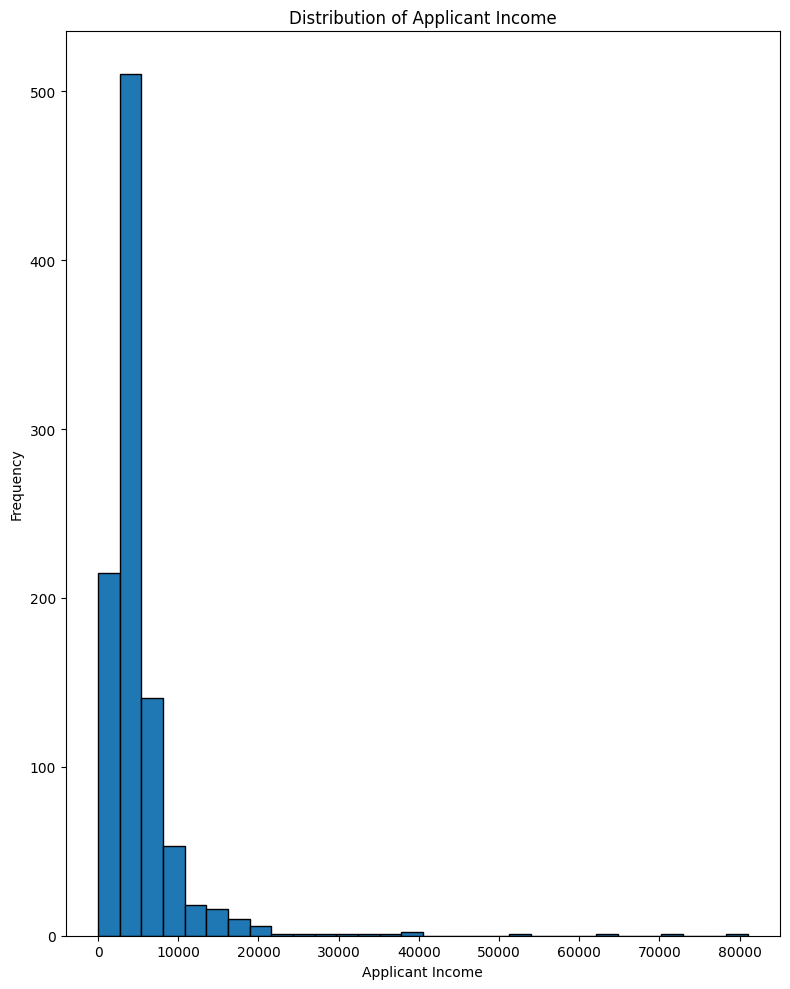

In [76]:
plt.figure(figsize=(8, 10))
plt.hist(df['ApplicantIncome'], bins=30, edgecolor='black')
plt.title("Distribution of Applicant Income")
plt.xlabel("Applicant Income")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [78]:
def univariate_numerical_eda(df, column):
    """
    Performs univariate EDA on a single numerical column.
    Displays summary statistics, skewness, kurtosis, histogram, KDE, and boxplot.
    """
    print(f" Feature: {column}")
    print("="*40)
    print(df[column].describe().to_frame())
    print(f"\nSkewness: {df[column].skew():.3f}")
    print(f"Kurtosis: {df[column].kurt():.3f}")

    plt.figure(figsize=(12,4))

    # Histogram + KDE
    plt.subplot(1,2,1)
    sns.histplot(df[column], kde=True, bins=30, color='teal')
    plt.title(f'\n Distribution of {column}', fontsize=13)
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df[column], color='teal')
    plt.title(f'\n Boxplot of {column}', fontsize=13)

    plt.tight_layout()
    plt.show()

    # Optional note on transformation
    if abs(df[column].skew()) > 1:
        print(f"\n {column} is highly skewed. Consider log or Box-Cox transformation.")
    elif abs(df[column].skew()) > 0.5:
        print(f"{column} is moderately skewed.")
    else:
        print(f"{column} is fairly symmetric.")

 Feature: Unnamed: 0
       Unnamed: 0
count  981.000000
mean   490.000000
std    283.334608
min      0.000000
25%    245.000000
50%    490.000000
75%    735.000000
max    980.000000

Skewness: 0.000
Kurtosis: -1.200


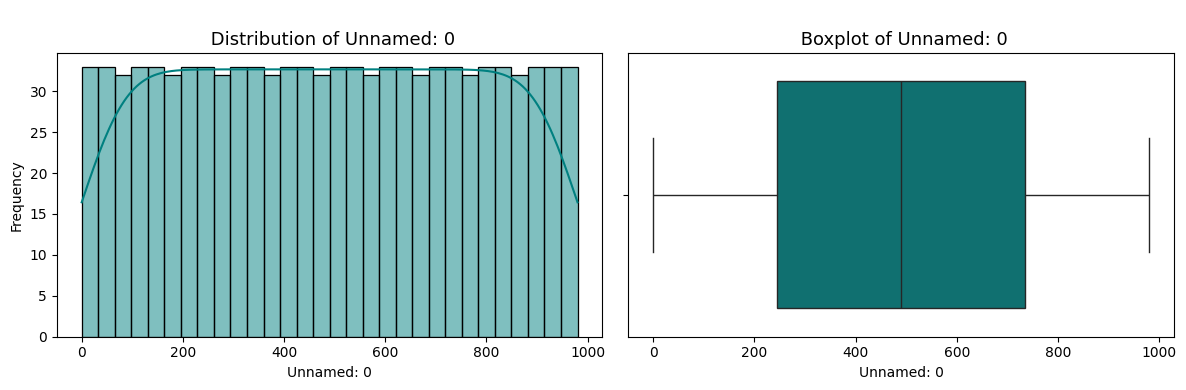

Unnamed: 0 is fairly symmetric.
 Feature: ApplicantIncome
       ApplicantIncome
count       981.000000
mean       5179.795107
std        5695.104533
min           0.000000
25%        2875.000000
50%        3800.000000
75%        5516.000000
max       81000.000000

Skewness: 7.087
Kurtosis: 71.402


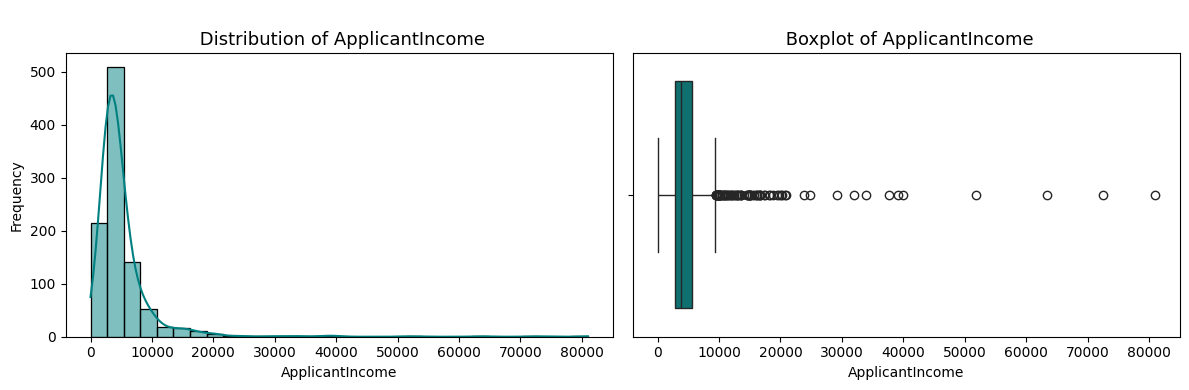


 ApplicantIncome is highly skewed. Consider log or Box-Cox transformation.
 Feature: CoapplicantIncome
       CoapplicantIncome
count         981.000000
mean         1601.916330
std          2718.772806
min             0.000000
25%             0.000000
50%          1110.000000
75%          2365.000000
max         41667.000000

Skewness: 6.844
Kurtosis: 77.357


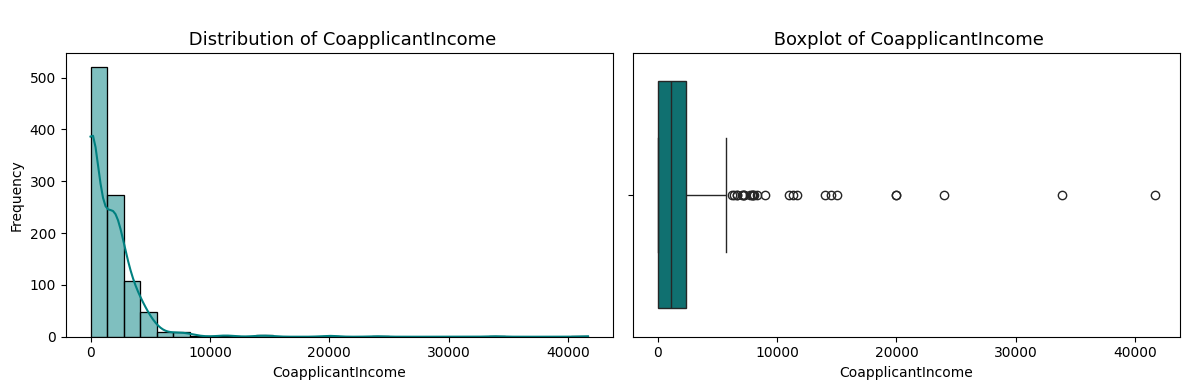


 CoapplicantIncome is highly skewed. Consider log or Box-Cox transformation.
 Feature: LoanAmount
       LoanAmount
count  954.000000
mean   142.511530
std     77.421743
min      9.000000
25%    100.000000
50%    126.000000
75%    162.000000
max    700.000000

Skewness: 2.714
Kurtosis: 11.545


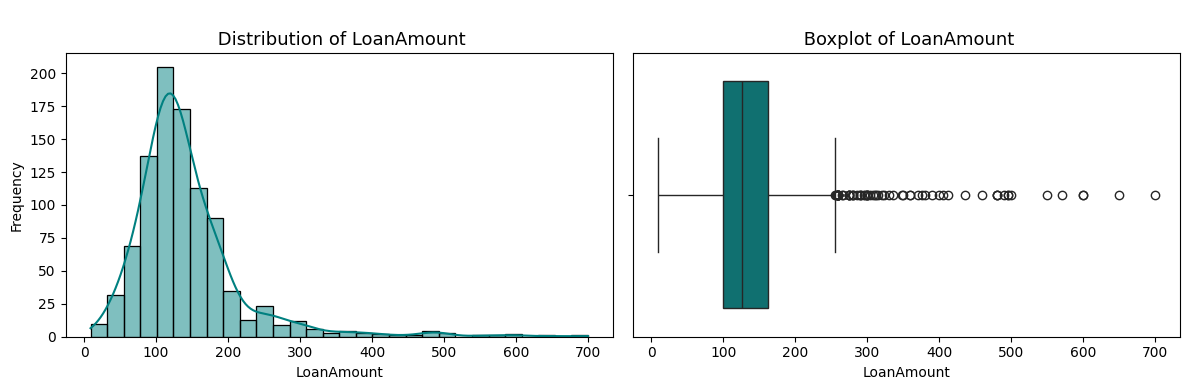


 LoanAmount is highly skewed. Consider log or Box-Cox transformation.
 Feature: Loan_Amount_Term
       Loan_Amount_Term
count        961.000000
mean         342.201873
std           65.100602
min            6.000000
25%          360.000000
50%          360.000000
75%          360.000000
max          480.000000

Skewness: -2.477
Kurtosis: 7.367


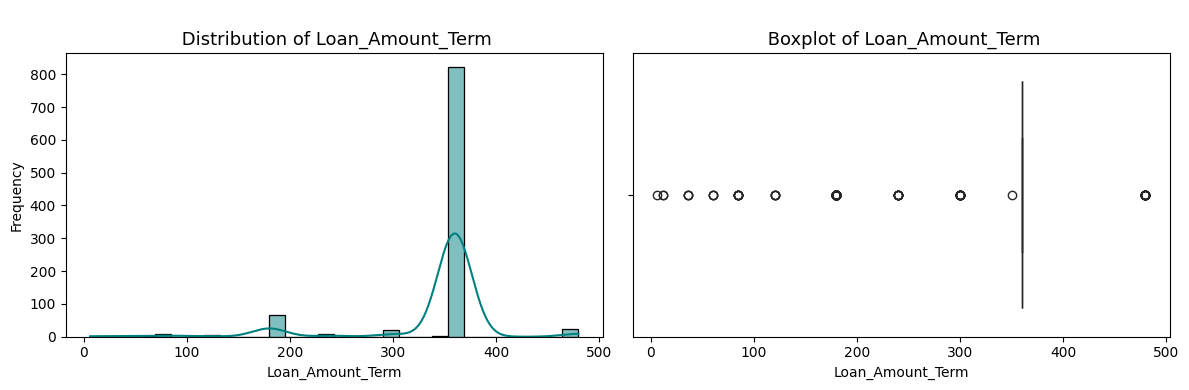


 Loan_Amount_Term is highly skewed. Consider log or Box-Cox transformation.
 Feature: Credit_History
       Credit_History
count      902.000000
mean         0.835920
std          0.370553
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000

Skewness: -1.817
Kurtosis: 1.305


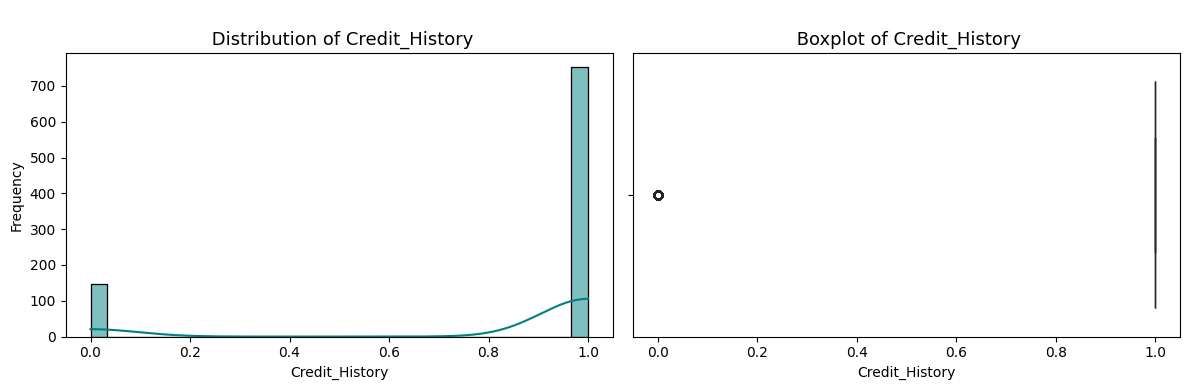


 Credit_History is highly skewed. Consider log or Box-Cox transformation.


In [80]:
for column in num_features:
    univariate_numerical_eda(df,column)

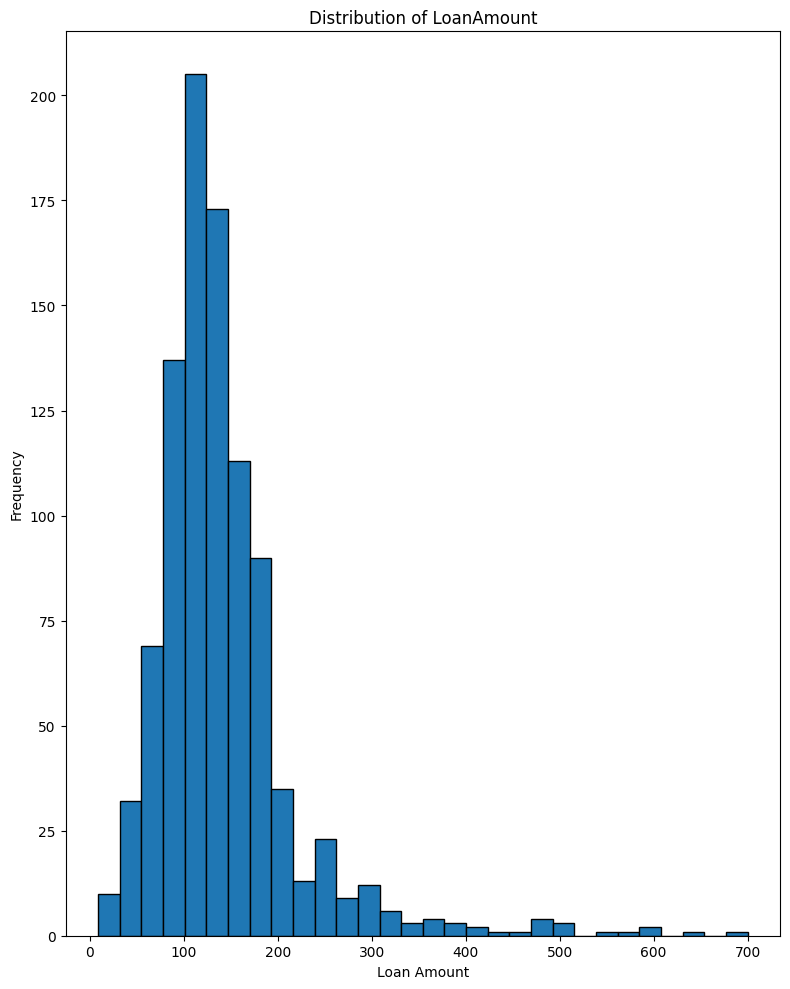

In [77]:
plt.figure(figsize=(8, 10))
plt.hist(df['LoanAmount'], bins=30, edgecolor='black')
plt.title("Distribution of LoanAmount")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

`Task 2.3: Analyze categorical features (e.g., education, employment status, property area) using bar charts and pie charts.`

In [75]:
# plt.figure(figsize=(8, 8))
# plt.bar(married_count.index, married_count.values, color='skyblue', edgecolor='black')
# plt.title('Distribution of Married applicants by gender')
# plt.xlabel('Education')
# plt.ylabel('Count')
# plt.legend(['Education'], title='Category', loc='lower right', fontsize=8)
# plt.show()

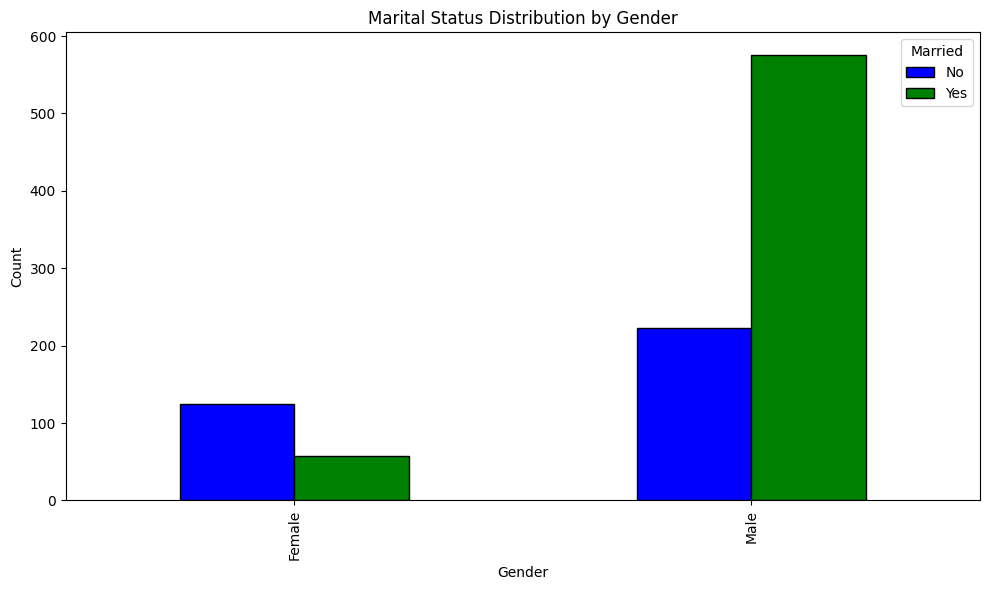

In [74]:
gender_married = pd.crosstab(df['Gender'], df['Married'])

gender_married.plot(kind='bar', figsize=(10,6), color=['blue', 'green'], edgecolor='black')

plt.title('Marital Status Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Married')
plt.tight_layout()
plt.show()

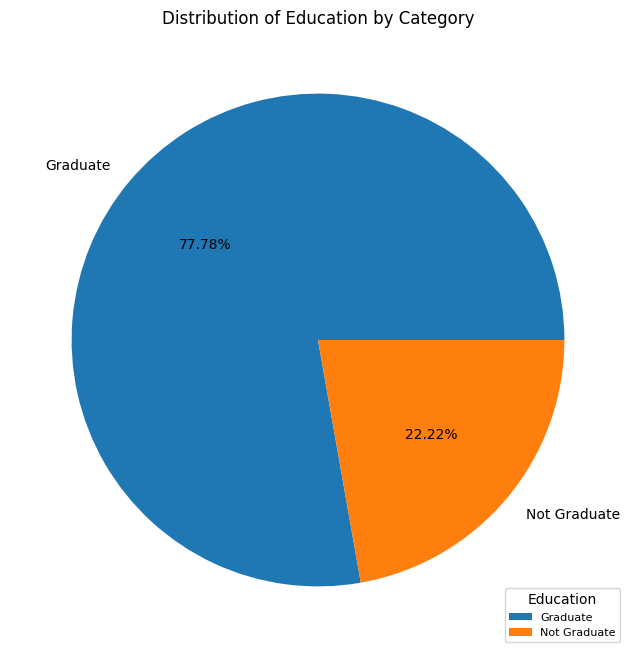

In [59]:
plt.figure(figsize=(12,8))
plt.pie(Edu_counts.values, labels=Edu_counts.index, autopct='%1.2f%%')
plt.title('Distribution of Education by Category')
plt.legend(title='Education', loc='lower right', fontsize=8)
plt.show()

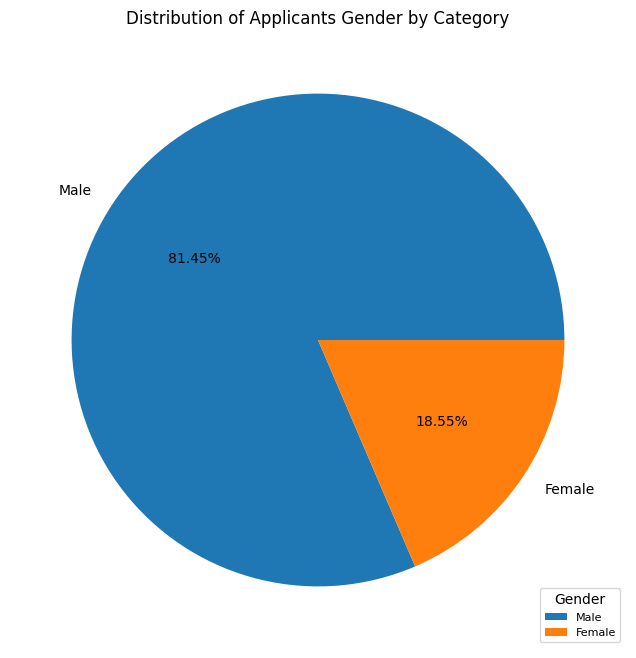

In [58]:
plt.figure(figsize=(12,8))
plt.pie(Gender_count.values, labels=Gender_count.index, autopct='%1.2f%%')
plt.title('Distribution of Applicants Gender by Category')
plt.legend(title='Gender', loc='lower right', fontsize=8)
plt.show()

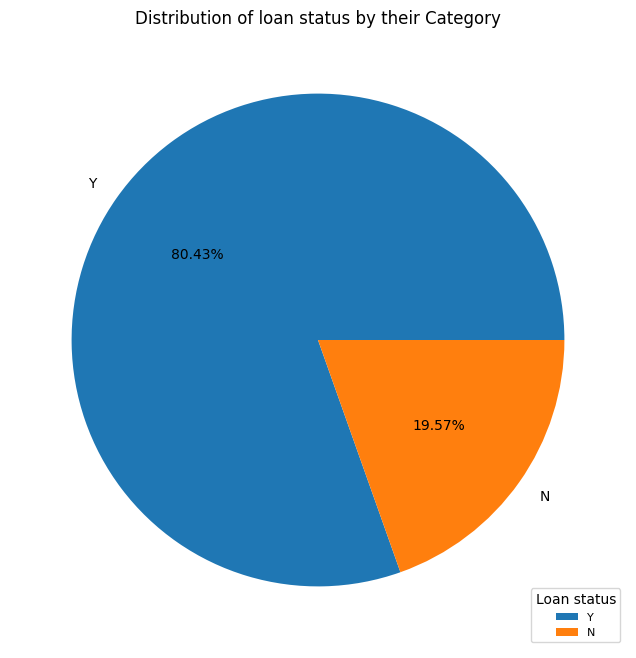

In [51]:
plt.figure(figsize=(12,8))
plt.pie(loan_status_counts.values, labels=loan_status_counts.index, autopct='%1.2f%%')
plt.title('Distribution of loan status by their Category')
plt.legend(title='Loan status', loc='lower right', fontsize=8)
plt.show()

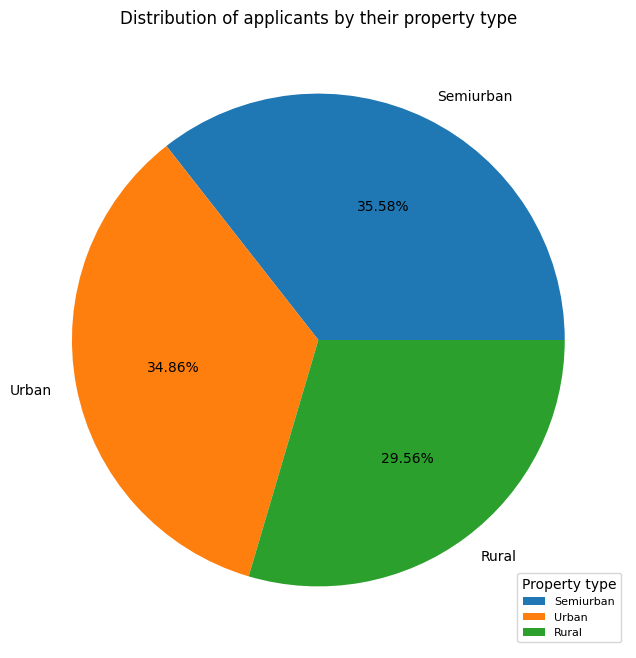

In [ ]:
# Plotting the distribution of Applicants by their property Area
plt.figure(figsize=(12,8))
plt.pie(property_counts.values, labels=property_counts.index, autopct='%1.2f%%')
plt.title('Distribution of applicants by their property Area')
plt.legend(title='Property Area', loc='lower right', fontsize=8)
plt.show()